46
drawing image from arcGIS server... ...finished


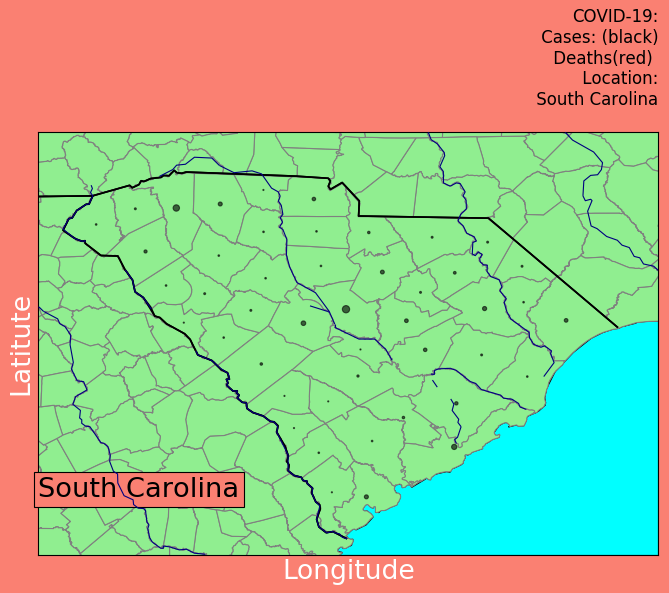

In [59]:
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import numpy as np
from PIL import Image,ImageFont,ImageDraw,ImageFilter,ImageChops
from random import randint
from mpl_toolkits.basemap import Basemap
#prevents a warning from using Python3 instaead of Python2
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.insert(1, "/home/jack/hidden")
import Key
import twython
from twython import Twython
# Make the figure
#fig = plt.figure()
#ax = fig.add_subplot(111)

# Easiest way to make a basemap is to use the cylidrical projection and 
# define the bottom left lat/lon and top right lat/lon corners

def RndState():
    TX=["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]
    x=randint(1,50)
    return TX[x]
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-27-2020.csv"
#LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
LATd=[]
LONGd=[]
STATES=[]
cases=[]
deaths =[]
longitude = ""
search = RndState()
for line in DataIn:
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    if search in line[2] and "-" in (line[6]):
        text=line[2],line[1],line[3],line[4],line[5],line[6],line[7],line[8],line[9],line[10]
        STATES.append(text)
        LAT.append(line[5])
        LONG.append(line[6])
        if int(line[8])>0:
            LATd.append(line[5])
            LONGd.append(line[6])        
        cases.append(line[7])
        deaths.append(line[8])
        longitude = longitude+line[6]+","
print(len(STATES))        
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
LTd = np.array(LATd,dtype=np.float)
LGd = np.array(LONGd,dtype=np.float)


fig = plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='salmon')


urcrnrlat=max(LT)+.5
llcrnrlat=min(LT)-.5
urcrnrlon=max(LG)+.8
llcrnrlon=min(LG)-.5
lat_0 = (urcrnrlat+llcrnrlat)/2
lon_0 =(urcrnrlon+llcrnrlon)/2

# create the map object, m
m = Basemap(resolution='i', projection='cyl', \
    llcrnrlon=llcrnrlon, llcrnrlat=llcrnrlat, urcrnrlon=urcrnrlon, urcrnrlat=urcrnrlat)

# Note: You can define the resolution of the map you just created. Higher 
# resolutions take longer to create.
#    'c' - crude
#    'l' - low
#    'i' - intermediate
#    'h' - high
#    'f' - full

# Draw some map elements on the map
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='#ddaa66',lake_color='aqua')
m.drawcoastlines()
m.drawrivers(linewidth=1.0,color='navy',zorder=8)
m.drawcounties(linewidth=1.0, linestyle='solid', color='gray', antialiased=1, facecolor='lightgreen', ax=None, zorder=2, drawbounds=True)
m.drawstates(linewidth=1.5, linestyle='solid', color='black', antialiased=1,zorder=2, )
plt.text(llcrnrlon,llcrnrlat+.5, search, color='black', fontsize=24.5, zorder=6,bbox=dict(facecolor='salmon'))

# Drawing ArcGIS Basemap (only works with cylc projections??)
# Examples of what each map looks like can be found here:
# http://kbkb-wx-python.blogspot.com/2016/04/python-basemap-background-image-from.html
maps = ['ESRI_Imagery_World_2D',    # 0
        'ESRI_StreetMap_World_2D',  # 1
        'NatGeo_World_Map',         # 2
        'NGS_Topo_US_2D',           # 3
        'Ocean_Basemap',            # 4
        'USA_Topo_Maps',            # 5
        'World_Imagery',            # 6
        'World_Physical_Map',       # 7
        'World_Shaded_Relief',      # 8
        'World_Street_Map',         # 9
        'World_Terrain_Base',       # 10
        'World_Topo_Map'            # 11
        ]
print ("drawing image from arcGIS server..."),
m.arcgisimage(service=maps[8], xpixels=1000, verbose=False)
print ("...finished")

S=1
Size=[]
for x in cases:
    S=1+(float(x)*.05)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

Sd=0
Sized=[]
for xd in deaths:
    Sd=0+(float(xd)*.01)
    Sized.append(int(Sd))
    #print(int(S))
sd = np.array(Sized)
#print(Sized)
plt.title("COVID-19:\n Cases: (black)\n Deaths(red) \n Location:\n "+search+"\n", fontsize=15, loc='right')
#plt.text(max(LG-1.2),max(LT), search, color='white', fontsize=24)
#x, y = m(lons, lats)  # transform coordinates
x, y = m(LGd, LTd)
xx,yy = m(LG, LT)
plt.xlabel('Longitude',color="white", fontsize=24)
plt.ylabel('Latitute',color="white", fontsize=24)

m.scatter(xx, yy, s=s, color='black', zorder=5, alpha=0.6)
m.scatter(x, y, s=sd, color='r', zorder=10,  alpha=0.6)



#plt.scatter(x, y,  s=s, color="black", zorder=3, alpha=0.6)
#plt.scatter(x, y,  s=sd, color="red", zorder=6, alpha=0.6)
#plt.text(urcrnrlon,urcrnrlat, search, color='white', fontsize=24)
plt.savefig("BaseMap/"+search+"arcGIS__.png", dpi=120, facecolor='salmon', edgecolor='b',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches="tight", pad_inches=0.2,
        frameon=None, metadata=None)


# Add plot title and other plot elements the normal way
filename0 = "BaseMap/"+search+"arcGIS__.png"


def draw_blurred_back(img, position, text, font, col, halo_col):
    halo = Image.new('RGBA', img.size, (0, 0, 0, 0))
    ImageDraw.Draw(halo).text(position, text, font = font, fill = halo_col)
    blurred_halo = halo.filter(ImageFilter.BLUR)
    ImageDraw.Draw(blurred_halo).text(position, text, font = font, fill = col)
    return Image.composite(img, blurred_halo, ImageChops.invert(blurred_halo))

if __name__ == '__main__':
    
    basewidth = 720
    inp = Image.open(filename0)
    wpercent = (basewidth / float(inp.size[0]))
    hsize = int((float(inp.size[1]) * float(wpercent)))
    inp = inp.resize((basewidth, hsize), Image.ANTIALIAS)
    #img.save(resized_image.jpg')
    
    #inp = inp.resize((640,640), Image.ANTIALIAS)
    font = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 30)
    text_title = (255, 255,230) # bright green
    blur_title = (0, 0, 0)   # black

    i2 = draw_blurred_back(inp, (15, 30), "Plotting COVID-19 Data", font, text_title, blur_title)
    font0 = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 20)
    font1 = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 14)
    font2 = ImageFont.truetype("/home/jack/fonts/PatrickHand-Regular.ttf", 16)
    i2 = draw_blurred_back(i2, (15, 65), "Plot Using ArcGIS Basemap - "+search, font0, text_title, blur_title)
    TXT="https://github.com/JupyterJones/COVID-19-Jupyter-Notebooks"
    draw = ImageDraw.Draw(i2) 
    draw.text((15, 5), TXT, font = font2, align ="left",fill="black")
    #i2 = draw(i2, (15, 65),TXT, font1)    
    
    #txt = Image.new('RGBA', i.size, (255,255,255,0))

    # get a font
    fnt = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 20)
    # get a drawing context
    signature_ = "@jacklnorthrup" 
    #get length in pixel of signature_
    sizeS,ln = fnt.getsize(signature_)
    #add 15 pixels to right border
    pt = sizeS+25
    width, height = inp.size
    #marginx starting point of signature_
    marginx = pt
    #bottom margin
    marginy = 30
    x = width - marginx
    y = height - marginy
    

    text_sig = (255, 255,230) # bright green
    blur_sig = (0, 0, 0)   # black
    txt=draw_blurred_back(i2,(x,y), signature_, fnt, text_sig, blur_sig)
    out = Image.alpha_composite(i2, txt)
    out.save("images/TEMP_POST.png")

CONSUMER_KEY = Key.twiter()[0]
CONSUMER_SECRET = Key.twiter()[1]
ACCESS_KEY = Key.twiter()[2]
ACCESS_SECRET = Key.twiter()[3]
twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_KEY, ACCESS_SECRET)

STR = "#"+search+"  #arcGIS server #Basemap #COVID-19 - #Python  Plot data using "+TXT+" #JupyterJones" 

PATH = "images/TEMP_POST.png"
photo = open(PATH,'rb')
#response = twitter.upload_media(media=photo)
#twitter.update_status(status=STR, media_ids=[response['media_id']])

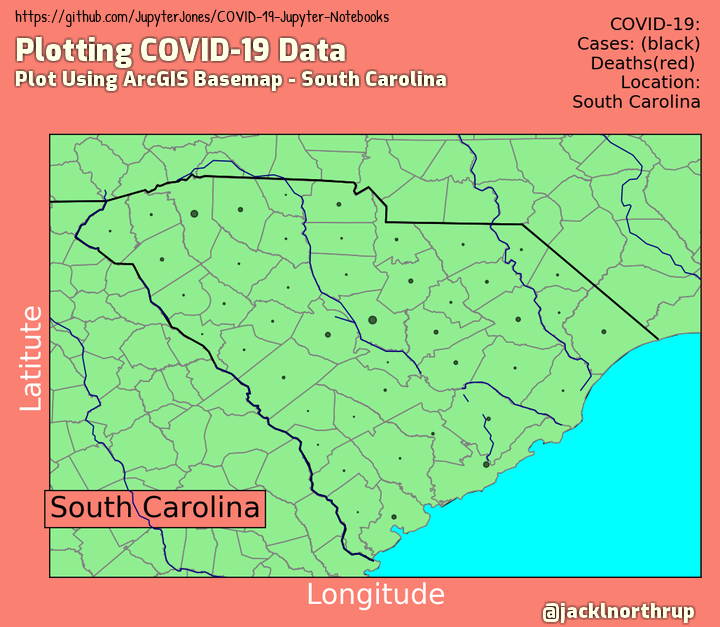

In [60]:
from PIL import Image
IM = Image.open(PATH)
IM

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import numpy as np
from PIL import Image,ImageFont,ImageDraw,ImageFilter,ImageChops
from random import randint
from mpl_toolkits.basemap import Basemap
#prevents a warning from using Python3 instaead of Python2
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.insert(1, "/home/jack/hidden")
import Key
import twython
from twython import Twython
# Make the figure
#fig = plt.figure()
#ax = fig.add_subplot(111)

# Easiest way to make a basemap is to use the cylidrical projection and 
# define the bottom left lat/lon and top right lat/lon corners

def RndState():
    TX=["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]
    x=randint(1,50)
    return TX[x]
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-27-2020.csv"
#LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
LATd=[]
LONGd=[]
STATES=[]
cases=[]
deaths =[]
longitude = ""
search = "China"
for line in DataIn:
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    if search in line[2] and "-" in (line[6]):
        text=line[2],line[1],line[3],line[4],line[5],line[6],line[7],line[8],line[9],line[10]
        STATES.append(text)
        LAT.append(line[5])
        LONG.append(line[6])
        if int(line[8])>0:
            LATd.append(line[5])
            LONGd.append(line[6])        
        cases.append(line[7])
        deaths.append(line[8])
        longitude = longitude+line[6]+","
print(len(STATES))        
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
LTd = np.array(LATd,dtype=np.float)
LGd = np.array(LONGd,dtype=np.float)


fig = plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='salmon')

'''
urcrnrlat=max(LT)+.5
llcrnrlat=min(LT)-.5
urcrnrlon=max(LG)+.8
llcrnrlon=min(LG)-.5
lat_0 = (urcrnrlat+llcrnrlat)/2
lon_0 =(urcrnrlon+llcrnrlon)/2
46.26626028
42.33112163
-95.8557828
-104.2929428



'''

urcrnrlat=55
llcrnrlat=14
urcrnrlon=75
llcrnrlon=135
lat_0 = (urcrnrlat+llcrnrlat)/2
lon_0 =(urcrnrlon+llcrnrlon)/2

print(urcrnrlat)
print(llcrnrlat)
print(urcrnrlon)
print(llcrnrlon)

# urcrnrlat,llcrnrlat,urcrnrlon,llcrnrlon
#lon_min, lon_max = 75, 135
#lat_min, lat_max = 15, 55



# create the map object, m
m = Basemap(resolution='i', projection='cyl', \
    llcrnrlon=llcrnrlon, llcrnrlat=llcrnrlat, urcrnrlon=urcrnrlon, urcrnrlat=urcrnrlat)

# Note: You can define the resolution of the map you just created. Higher 
# resolutions take longer to create.
#    'c' - crude
#    'l' - low
#    'i' - intermediate
#    'h' - high
#    'f' - full

# Draw some map elements on the map
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='#ddaa66',lake_color='aqua')
m.drawcoastlines()
m.drawrivers(linewidth=1.0,color='navy',zorder=8)
m.drawcounties(linewidth=1.0, linestyle='solid', color='gray', antialiased=1, facecolor='lightgreen', ax=None, zorder=2, drawbounds=True)
m.drawstates(linewidth=1.5, linestyle='solid', color='black', antialiased=1,zorder=2, )
plt.text(llcrnrlon,llcrnrlat+.5, search, color='black', fontsize=24.5, zorder=6,bbox=dict(facecolor='salmon'))

# Drawing ArcGIS Basemap (only works with cylc projections??)
# Examples of what each map looks like can be found here:
# http://kbkb-wx-python.blogspot.com/2016/04/python-basemap-background-image-from.html
maps = ['ESRI_Imagery_World_2D',    # 0
        'ESRI_StreetMap_World_2D',  # 1
        'NatGeo_World_Map',         # 2
        'NGS_Topo_US_2D',           # 3
        'Ocean_Basemap',            # 4
        'USA_Topo_Maps',            # 5
        'World_Imagery',            # 6
        'World_Physical_Map',       # 7
        'World_Shaded_Relief',      # 8
        'World_Street_Map',         # 9
        'World_Terrain_Base',       # 10
        'World_Topo_Map'            # 11
        ]
print ("drawing image from arcGIS server..."),
#m.arcgisimage(service=maps[8], xpixels=1000, verbose=False)
m.arcgisimage(service=maps[9], xpixels=2500, verbose=False)
print ("...finished")

S=1
Size=[]
for x in cases:
    S=1+(float(x)*.05)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

Sd=0
Sized=[]
for xd in deaths:
    Sd=0+(float(xd)*.01)
    Sized.append(int(Sd))
    #print(int(S))
sd = np.array(Sized)
#print(Sized)
plt.title("COVID-19:\n Cases: (black)\n Deaths(red) \n Location:\n "+search+"\n", fontsize=15, loc='right')
#plt.text(max(LG-1.2),max(LT), search, color='white', fontsize=24)
#x, y = m(lons, lats)  # transform coordinates
x, y = m(LGd, LTd)
xx,yy = m(LG, LT)
plt.xlabel('Longitude',color="white", fontsize=24)
plt.ylabel('Latitute',color="white", fontsize=24)

m.scatter(xx, yy, s=s, color='black', zorder=5, alpha=0.6)
m.scatter(x, y, s=sd, color='r', zorder=10,  alpha=0.6)



#plt.scatter(x, y,  s=s, color="black", zorder=3, alpha=0.6)
#plt.scatter(x, y,  s=sd, color="red", zorder=6, alpha=0.6)
#plt.text(urcrnrlon,urcrnrlat, search, color='white', fontsize=24)
plt.savefig("BaseMap/"+search+"arcGIS__.png", dpi=120, facecolor='salmon', edgecolor='b',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches="tight", pad_inches=0.2,
        frameon=None, metadata=None)
#plt.show()
# Plot a scatter point at WBB on the map object
#lon = -111.85
#lat = 40.77
#m.scatter(lon,lat,c='r',s=150)

# Plot some wind barbs
#lons = np.arange(-115,-100,.5)
#lats = np.arange(33,48,.5)
#u = np.arange(-5,10,.5)
#v = np.arange(5,20,.5)
#m.barbs(lons, lats, u, v, color='fuchsia')

# Plot line between two points
# (can also use greatcircle function to be more accurate)
#x = [-110, -112]
#y = [40, 42]
#m.plot(x, y, color='navy', lw=5)

# Fill two polygon shapes
#patches = []
#homeplate = np.array([[-114,38],[-113,37],[-112,38],[-112,40],[-114,40]])
#patches.append(Polygon(homeplate))
#triangle = np.array([[-111,38],[-110,37],[-110,42]])
#patches.append(Polygon(triangle))
#ax.add_collection(PatchCollection(patches, facecolor='lightgreen', edgecolor='k', linewidths=1.5))

# Plot shapefiles: see here: http://basemaptutorial.readthedocs.io/en/latest/shapefile.html

# Plot contours
#m.contour(lons2D, lats2D, values2D)  # contour lines
# m.contourf(lons2D, lats2D, values2D) # contour color filled, can specify a cmap

# Plot gridded data
# m.pcolormesh(lons2D, lats2D, values2D) # can specify a cmap

# Add plot title and other plot elements the normal way
filename0 = "BaseMap/"+search+"arcGIS__.png"


def draw_blurred_back(img, position, text, font, col, halo_col):
    halo = Image.new('RGBA', img.size, (0, 0, 0, 0))
    ImageDraw.Draw(halo).text(position, text, font = font, fill = halo_col)
    blurred_halo = halo.filter(ImageFilter.BLUR)
    ImageDraw.Draw(blurred_halo).text(position, text, font = font, fill = col)
    return Image.composite(img, blurred_halo, ImageChops.invert(blurred_halo))

if __name__ == '__main__':
    
    basewidth = 720
    inp = Image.open(filename0)
    wpercent = (basewidth / float(inp.size[0]))
    hsize = int((float(inp.size[1]) * float(wpercent)))
    inp = inp.resize((basewidth, hsize), Image.ANTIALIAS)
    #img.save(resized_image.jpg')
    
    #inp = inp.resize((640,640), Image.ANTIALIAS)
    font = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 30)
    text_title = (255, 255,230) # bright green
    blur_title = (0, 0, 0)   # black

    i2 = draw_blurred_back(inp, (15, 30), "Plotting COVID-19 Data", font, text_title, blur_title)
    font0 = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 20)
    font1 = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 14)
    font2 = ImageFont.truetype("/home/jack/fonts/PatrickHand-Regular.ttf", 16)
    i2 = draw_blurred_back(i2, (15, 65), "Plot Using ArcGIS Basemap - "+search, font0, text_title, blur_title)
    TXT="https://github.com/JupyterJones/COVID-19-Jupyter-Notebooks"
    draw = ImageDraw.Draw(i2) 
    draw.text((15, 5), TXT, font = font2, align ="left",fill="black")
    #i2 = draw(i2, (15, 65),TXT, font1)    
    
    #txt = Image.new('RGBA', i.size, (255,255,255,0))

    # get a font
    fnt = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 20)
    # get a drawing context
    signature_ = "@jacklnorthrup" 
    #get length in pixel of signature_
    sizeS,ln = fnt.getsize(signature_)
    #add 15 pixels to right border
    pt = sizeS+25
    width, height = inp.size
    #marginx starting point of signature_
    marginx = pt
    #bottom margin
    marginy = 30
    x = width - marginx
    y = height - marginy
    

    text_sig = (255, 255,230) # bright green
    blur_sig = (0, 0, 0)   # black
    txt=draw_blurred_back(i2,(x,y), signature_, fnt, text_sig, blur_sig)
    out = Image.alpha_composite(i2, txt)
    out.save("images/TEMP_POST.png")

CONSUMER_KEY = Key.twiter()[0]
CONSUMER_SECRET = Key.twiter()[1]
ACCESS_KEY = Key.twiter()[2]
ACCESS_SECRET = Key.twiter()[3]
twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_KEY, ACCESS_SECRET)

STR = "#"+search+"  #arcGIS server #Basemap #COVID-19 - #Python  Plot data using "+TXT+" #JupyterJones" 

PATH = "images/TEMP_POST.png"
photo = open(PATH,'rb')
#response = twitter.upload_media(media=photo)
#twitter.update_status(status=STR, media_ids=[response['media_id']])

In [ ]:
FILE="csv/CHINAdata.csv"
DataIn = open(FILE).read()
DataIn = DataIn.splitlines()
datajoined = []
cnt = 0
print (len(DataIn))
for i in range(0,len(DataIn)):
    cnt = cnt+1
    items = DataIn[i].split(",")
    if cnt>1:
        City = items[0]
        Longitude = float(items[2])
        Latitude = float(items[1])
        print(City,Longitude,Latitude)
        data

In [ ]:
#https://gadm.org/download_country_v3.html

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
plt.figure(figsize=(16,8))
#m = Basemap()
#m = Basemap(llcrnrlon=73, llcrnrlat=18, urcrnrlon=135, urcrnrlat=53)
m = Basemap(llcrnrlon=77, llcrnrlat=14, urcrnrlon=140, urcrnrlat=51, projection= 'lcc' , lat_1=33, lat_2=45, lon_0=100)
data == 
m.readshapefile('China/gadm36_CHN_1', 'states', drawbounds=True) 
#   same m.readshapefile('China/China_Cities_Towns', 'China_Cities_Towns', drawbounds=True)
#   same    m.readshapefile('China/China_Cities_Towns', 'China_Cities_Towns', drawbounds=True)
#m.readshapefile( CHN_adm_shp/CHN_adm1 , states , drawbounds=True) 
m.drawcoastlines()
m.drawcountries(linewidth=1.5)
plt.show()
 

31


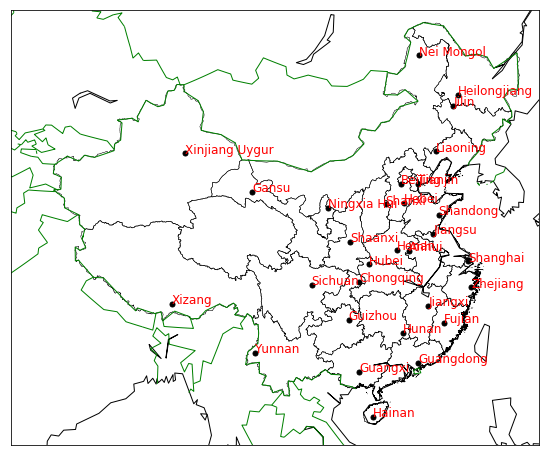

In [18]:
#https://gadm.org/download_country_v3.html
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
plt.figure(figsize=(16,8))

m = Basemap(llcrnrlon=77, llcrnrlat=14, urcrnrlon=140, urcrnrlat=51, projection= 'lcc' , lat_1=33, lat_2=45, lon_0=100)
m.readshapefile('China/gadm36_CHN_1', 'states', drawbounds=True) 
#   same m.readshapefile('China/China_Cities_Towns', 'China_Cities_Towns', drawbounds=True)
#   same    m.readshapefile('China/China_Cities_Towns', 'China_Cities_Towns', drawbounds=True)
#m.readshapefile( CHN_adm_shp/CHN_adm1 , states , drawbounds=True) 
m.drawcoastlines()
m.drawcountries(linewidth=1.0, color="green")

FILE="csv/CHINAdata.csv"
DataIn = open(FILE).read()
DataIn = DataIn.splitlines()
datajoined = []
cnt = 0
print (len(DataIn))
for i in range(0,len(DataIn)):
    cnt = cnt+1
    items = DataIn[i].split(",")
    if cnt>1:
        State = items[0]
        Longitude = float(items[2])
        Latitude = float(items[1])
        x, y = m(Longitude,Latitude)
        plt.plot(x, y, 'ok', markersize=5)
        plt.text(x, y, State, fontsize=12, color="red");





plt.show()
 

In [17]:
%%writefile csv/CHINAdata.csv
States,Latitude,Longitude
Anhui,33.25043683,115.3500028
Beijing,39.54005292,115.789976
Chongqing,31.05044191,109.5166638
Fujian,26.2299868,117.5800476
Gansu,39.83003522,97.72999304
Guangdong,23.07997235,114.3999833
Guangxi,22.95042889,108.6199743
Guizhou,27.68041506,108.0200207
Hainan,18.85910454,109.5040317
Hebei,37.71998313,115.7000073
Heilongjiang,46.39999595,125.3200402
Henan,33.57000388,114.02998
Hubei,32.57003908,110.7799975
Hunan,25.96997683,113.4000443
Jiangsu,34.38000612,118.3500264
Jiangxi,27.97034568,116.3600187
Jilin,45.49999921,124.2999991
Liaoning,41.81001772,120.7600085
Nei Mongol,50.78332013,121.5166548
Ningxia Hui,38.13327578,106.7690279
Shaanxi,34.79525209,108.937775
Shandong,35.98995953,119.3800927
Shanghai,31.21645245,121.4365047
Shanxi,37.86997398,113.5700081
Sichuan,31.13333091,104.3999735
Tianjin,39.23195803,117.7769864
Xinjiang Uygur,42.93537539,89.1650378
Xizang,28.95000165,89.63332963
Yunnan,25.03331565,98.46658891
Zhejiang,28.85000775,121.1199865


Overwriting csv/CHINAdata.csv


In [ ]:
%%writefile csv/CHINAdata.csv
States,Latitude,Longitude
Anhui,33.25043683,115.3500028
Beijing,39.54005292,115.789976
Chongqing,31.05044191,109.5166638
Fujian,26.2299868,117.5800476
Gansu,39.83003522,97.72999304
Guangdong,23.07997235,114.3999833
Guangxi,21.95042889,108.6199743
Guizhou,27.68041506,109.1300207
Hainan,18.85910454,109.5040317
Hebei,37.71998313,115.7000073
Heilongjiang,46.39999595,125.3200402
Henan,33.57000388,114.02998
Hubei,32.57003908,110.7799975
Hunan,25.96997683,113.4000443
Jiangsu,34.38000612,118.3500264
Jiangxi,27.97034568,116.3600187
Jilin,45.49999921,124.2999991
Liaoning,41.81001772,120.7600085
Nei Mongol,50.78332013,121.5166548
Ningxia Hui,39.23327578,106.7690279
Shaanxi,34.79525209,109.937775
Shandong,35.98995953,119.3800927
Shanghai,31.21645245,121.4365047
Shanxi,37.86997398,113.5700081
Sichuan,31.13333091,104.3999735
Tianjin,39.23195803,117.7769864
Xinjiang Uygur,42.93537539,89.1650378
Xizang,28.95000165,89.63332963
Yunnan,25.03331565,98.46658891
Zhejiang,28.85000775,121.1199865


In [ ]:
%%writefile CHINAdata.py
DATA="""States,Latitude,Longitude
Anhui,33.25043683,115.3500028
Beijing,39.54005292,115.789976
Chongqing,31.05044191,109.5166638
Fujian,26.2299868,117.5800476
Gansu,39.83003522,97.72999304
Guangdong,23.07997235,114.3999833
Guangxi,21.95042889,108.6199743
Guizhou,27.68041506,109.1300207
Hainan,18.25910454,109.5040317
Hebei,37.71998313,115.7000073
Heilongjiang,46.39999595,125.3200402
Henan,33.57000388,114.02998
Hubei,32.57003908,110.7799975
Hunan,25.96997683,113.4000443
Jiangsu,34.38000612,118.3500264
Jiangxi,27.97034568,116.3600187
Jilin,45.49999921,124.2999991
Liaoning,41.81001772,120.7600085
Nei Mongol,50.78332013,121.5166548
Ningxia Hui,39.23327578,106.7690279
Shaanxi,34.79525209,109.937775
Shandong,35.98995953,119.3800927
Shanghai,31.21645245,121.4365047
Shanxi,37.86997398,113.5700081
Sichuan,31.13333091,104.3999735
Tianjin,39.23195803,117.7769864
Xinjiang Uygur,42.93537539,89.1650378
Xizang,28.95000165,89.63332963
Yunnan,25.03331565,98.46658891
Zhejiang,28.85000775,121.1199865"""

In [ ]:
import CHINAdata
data = CHINAdata.DATA.splitlines()
cnt=0
with open('csv/CHINAdata.csv','wb') as file:
    for line in data:
        file.write(line)
        file.write('\n')

In [ ]:
!rm csv/CHINAdata.csv

In [ ]:
res = CHINAdata.DATA
lines = res.split(",")
for line in lines:
    print(line)

In [22]:
print((77+140)/2)
print((14+51)/2)

    lat_1=55., lat_2=65.,
    lat_0=58., lon_0=-134)

108
32


Mon_25_May_2020_03_33_33_PM_PST.png


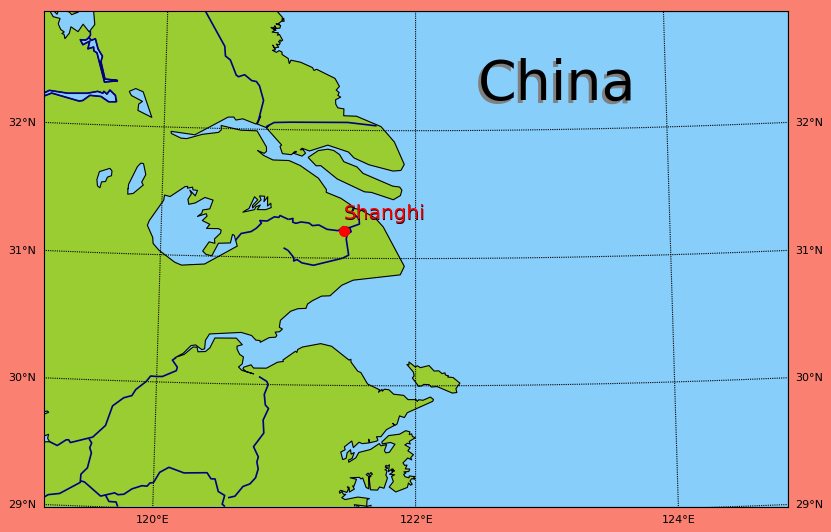

In [57]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import time
water = 'lightskyblue'
earth = 'yellowgreen'

Shanghi_lon, Shanghi_lat = 121.4365047,31.21645245


fig, ax1 = plt.subplots(figsize=(12, 10), dpi=80, facecolor='salmon')
mm = Basemap(
    width=600000, height=400000,
    resolution='i',
    projection='aea',
    ellps='WGS84',
    lat_1=55., lat_2=65.,
    lat_0=31., lon_0=122.)
coast = mm.drawcoastlines()
rivers = mm.drawrivers(color="navy", linewidth=1.5)
continents = mm.fillcontinents(
    color=earth,
    lake_color=water)
bound= mm.drawmapboundary(fill_color=water)
countries = mm.drawcountries()
merid = mm.drawmeridians(
    np.arange(-180, 180, 2), 
    labels=[False, False, False, True])
parall = mm.drawparallels(
    np.arange(0, 80), 
    labels=[True, True, False, False])

x,y=mm(122.5,32.25)          
plt.text(x, y, "China", fontsize=50, color="black",zorder=11) 
x,y=mm(122.47,32.22)          
plt.text(x, y, "China", fontsize=50, color="gray",zorder=10) 

x,y=mm(121.4365047,31.31645245)          
plt.text(x, y, "Shanghi", fontsize=18, color="red",zorder=11)
x,y=mm(121.430,31.310)          
plt.text(x, y, "Shanghi", fontsize=18.1, color="black",zorder=10) 


x, y = mm(Shanghi_lon, Shanghi_lat)
Shanghi = mm.scatter(x, y, 80,
    label="Shanghi", color='red', zorder=10)

filename = time.strftime('%a_%d_%b_%Y_%I_%M_%S_%p_%Z', time.gmtime())+".png"
fig.savefig(filename, facecolor=fig.get_facecolor(), edgecolor='black', bbox_inches='tight')
print(filename)

(831, 532)


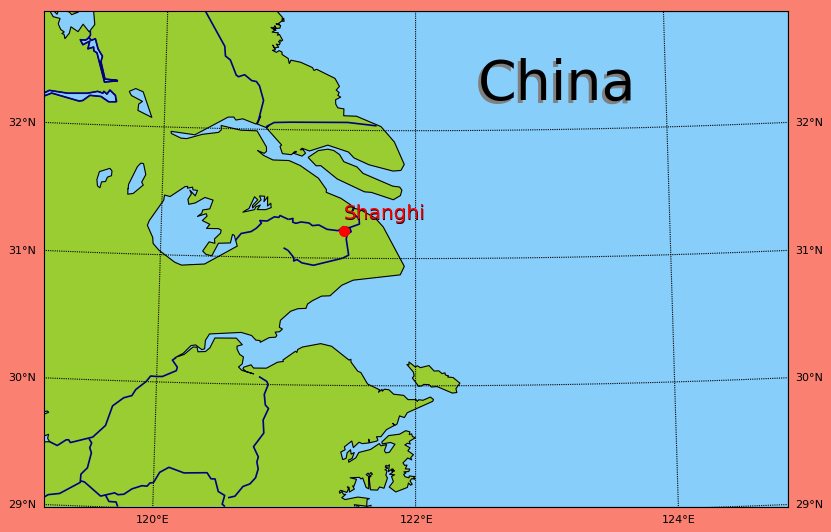

In [58]:
from PIL import Image
IM = Image.open(filename)
print(IM.size)
IM